In [20]:
#importing the necessary packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#loading the data
df=pd.read_csv('classification_data (1).csv')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [23]:
#dropping the duplicates of the data 
df=df.drop_duplicates()


In [24]:
df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
16,3,507,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace,True,True,507,0,1958,28745286,(not set)////(not set)////baby_products--chang...,1,2021-01-01
20,9,1037,Paid Search,0,GoogleAnalytics,Android,True,mobile,Dubai,25.2048,...,(not set),True,True,1674,0,138440,1054124685,food////food////food////food////food////food//...,1,2021-01-01


The data here has multiple unneceessary columns which can lead to noise and artificially boosted dimensionality. Dropping columns based on the need of the model is more effecient and sensible considering the afore mentioned situation.

In [25]:
#choosing the columns necessary for the model 
dfc=df[['count_session', 'count_hit', 'channelGrouping', 'device_browser',
       'device_operatingSystem', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'single_page_rate',
       'avg_session_time', 'latest_visit_id', 'earliest_visit_id',
       'time_latest_visit', 'avg_visit_time', 'days_since_first_visit',
       'visits_per_day',
        
       'num_interactions', 'time_on_site', 'transactionRevenue',
       'products_array', 'has_converted', 'target_date'

]]

In [26]:
dfc.head()

,count_session,count_hit,channelGrouping,device_browser,device_operatingSystem,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,historic_session,single_page_rate,...,time_latest_visit,avg_visit_time,days_since_first_visit,visits_per_day,num_interactions,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),GoogleAnalytics,Android,Sharjah,25.3463,55.4209,6504,0.777778,...,19.17,18,17,66.333333,1900,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,GoogleAnalytics,Android,Ajman,25.4052,55.5136,12466,0.821429,...,11.20,11,24,73.480000,3843,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,GoogleAnalytics,Android,Abu Dhabi,24.4539,54.3773,1575,1.000000,...,14.90,17,7,37.375000,592,1576,0,food////food,0,2021-01-01
16,3,507,Paid Search,GoogleAnalytics,iOS,Abu Dhabi,24.4539,54.3773,1000,1.000000,...,7.00,15,1,253.500000,507,1958,28745286,(not set)////(not set)////baby_products--chang...,1,2021-01-01
20,9,1037,Paid Search,GoogleAnalytics,Android,Dubai,25.2048,55.2708,3659,1.000000,...,7.52,10,24,41.480000,1674,138440,1054124685,food////food////food////food////food////food//...,1,2021-01-01


In [27]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   device_browser          9207 non-null   object 
 4   device_operatingSystem  9207 non-null   object 
 5   geoNetwork_region       9207 non-null   object 
 6   geoNetwork_latitude     9207 non-null   float64
 7   geoNetwork_longitude    9207 non-null   float64
 8   historic_session        9207 non-null   int64  
 9   single_page_rate        9207 non-null   float64
 10  avg_session_time        9207 non-null   float64
 11  latest_visit_id         9207 non-null   int64  
 12  earliest_visit_id       9207 non-null   int64  
 13  time_latest_visit       9207 non-null   float64
 14  avg_visit_time          9207 non-null   int6

In [28]:
#splitting the dataframe into two to check the correlation
#df1 shall be numeric 
df1=dfc.select_dtypes(include=['int64','float64'])

In [29]:
#checking for skew
df1.skew()

count_session              3.040429
count_hit                  3.936369
geoNetwork_latitude       -2.162403
geoNetwork_longitude      -6.696217
historic_session           3.972921
single_page_rate          -2.493042
avg_session_time           3.779757
latest_visit_id           -4.204707
earliest_visit_id         -3.158248
time_latest_visit         -0.227636
avg_visit_time             0.032848
days_since_first_visit    -1.453014
visits_per_day             4.029018
num_interactions           3.853291
time_on_site               9.502054
transactionRevenue        10.146591
has_converted              0.339590
dtype: float64

In [30]:
#using corrwith to check the correlation with 'has_converted
df1.corrwith(df1['has_converted'])

count_session             0.100391
count_hit                 0.228865
geoNetwork_latitude      -0.005509
geoNetwork_longitude      0.004429
historic_session         -0.022891
single_page_rate          0.129586
avg_session_time         -0.184679
latest_visit_id          -0.049603
earliest_visit_id        -0.110560
time_latest_visit         0.015030
avg_visit_time            0.000777
days_since_first_visit    0.097528
visits_per_day            0.164373
num_interactions          0.276152
time_on_site              0.067849
transactionRevenue        0.245539
has_converted             1.000000
dtype: float64

In [31]:
#chppsoing only the column with higher correlation 
df1=df1[['count_session','count_hit','num_interactions','has_converted']]

In [32]:
#df2 will be data frame with categorical column
df2=dfc.select_dtypes(include=['category','object'])

In [33]:
df2.head()

,channelGrouping,device_browser,device_operatingSystem,geoNetwork_region,products_array,target_date
0,(Other),GoogleAnalytics,Android,Sharjah,food////food////food,2021-01-01
2,Paid Search,GoogleAnalytics,Android,Ajman,"(not set)////baby_products--milk,_food_&_juice...",2021-01-01
3,Paid Search,GoogleAnalytics,Android,Abu Dhabi,food////food,2021-01-01
16,Paid Search,GoogleAnalytics,iOS,Abu Dhabi,(not set)////(not set)////baby_products--chang...,2021-01-01
20,Paid Search,GoogleAnalytics,Android,Dubai,food////food////food////food////food////food//...,2021-01-01


In [34]:
#cleaning product array
def clean_and_extract(categories_str):
    
    categories = categories_str.split("////")
    
    
    cleaned_value = categories[0] if categories[0] != "(not set)" else categories[1] if len(categories) > 1 else categories[0]

    return cleaned_value


df2['products_array'] = df2['products_array'].apply(clean_and_extract)

#creating a replacement dictionary to reduce and cleanup the features
replace_dict = {
    '.*baby_.*': 'baby_products',
    '.*food_cupboard.*': 'food_cupboard',
    '.*fresh_food.*': 'food',
    'حفاضات_اطفال|سراويل_الأطفال': 'non_food',
    'diapers,_wipes_&_diaper_cream|diapers,_wipes_&_diaper_cream ': 'baby_products',
    'changing_&_bathing|pull-ups_&_swimming_pants': 'non_food',
    r'\(not\s*set\)': 'not_set' 
}

df2['Products'] = df2['products_array'].str.lower().replace(replace_dict, regex=True)


In [35]:
#mapping the states and cities to their countries for ease of use 
state_country_mapping = {
    'Sharjah': 'UAE',
    'Ajman': 'UAE',
    'Abu Dhabi': 'UAE',
    'Dubai': 'UAE',
    'Ras al Khaimah': 'UAE',
    '(not set)': 'Unknown',  # Assuming '(not set)' doesn't represent a specific state
    'England': 'United Kingdom',
    'Hessen': 'Germany',
    'Ash Sharqia Governorate': 'Egypt',
    'Nabatiyeh Governorate': 'Lebanon',
    'Umm Al Quawain': 'UAE',
    'Indiana': 'United States',
    'Illinois': 'United States',
    'Makkah Province': 'Saudi Arabia',
    'Maharashtra': 'India',
    'Capital Governorate': 'Bahrain',
    'Jakarta': 'Indonesia',
    'Punjab': 'India',
    'Mount Lebanon Governorate': 'Lebanon',
    'South Holland': 'Netherlands',
    'Riyadh Province': 'Saudi Arabia',
    'Ile-de-France': 'France',
    'Chandigarh': 'India',
    'Karnataka': 'India',
    'Istanbul': 'Turkey',
    'Cairo Governorate': 'Egypt',
    'Andhra Pradesh': 'India',
    'Amman Governorate': 'Jordan',
    'Beirut Governorate': 'Lebanon',
    'Alexandria Governorate': 'Egypt',
    'New York': 'United States',
    'Ontario': 'Canada',
    'Davao Region': 'Philippines',
    'Auvergne-Rhone-Alpes': 'France',
    'Fujairah': 'UAE',
    'Tamil Nadu': 'India',
    'Pays de la Loire': 'France',
    'Metro Manila': 'Philippines',
    'Normandy': 'France',
    'Giza Governorate': 'Egypt',
    'Bavaria': 'Germany',
    'Stockholm County': 'Sweden',
    'Tel Aviv District': 'Israel',
    'Vienna': 'Austria',
    'Decentralized Administration of Peloponnese, Western Greece and the Ionian': 'Greece',
    'Porto District': 'Portugal',
    'West Bengal': 'India',
    'Kerala': 'India',
    'Lombardy': 'Italy',
    'MIMAROPA': 'Philippines',
    'North Holland': 'Netherlands',
    'Chiba': 'Japan',
    'Islamabad Capital Territory': 'Pakistan',
    'Ohio': 'United States',
    'Florida': 'United States',
    'Moscow': 'Russia',
    'County Dublin': 'Ireland',
    'Quebec': 'Canada',
    'Muscat Governorate': 'Oman',
    'Telangana': 'India',
    'Vastra Gotaland County': 'Sweden',
    'Western Cape': 'South Africa',
    'North Rhine-Westphalia': 'Germany',
    'Sindh': 'Pakistan',
    'Virginia': 'United States',
    'Calabarzon': 'Philippines',
    'Shanghai': 'China',
    'Central Luzon': 'Philippines',
    'Dakahlia Governorate': 'Egypt',
    'Western Province': 'Sri Lanka',
    'Flanders': 'Belgium',
    'Fars': 'Iran',
    'Washington': 'United States',
    'Tashkent Region': 'Uzbekistan',
    'Eastern Province': 'Saudi Arabia',
    'Federal Territory of Kuala Lumpur': 'Malaysia',
    'Goa': 'India',
    'Southern Governorate': 'Bahrain',
    'Madhya Pradesh': 'India',
    'Ismailia Governorate': 'Egypt',
    'Uttar Pradesh': 'India',
    'Casablanca-Settat': 'Morocco',
    'Nairobi County': 'Kenya',
    'Sofala Province': 'Mozambique',
    'Attica': 'Greece',
    'Tokyo': 'Japan',
    'Khyber Pakhtunkhwa': 'Pakistan',
    'Gujarat': 'India',
    'Assam': 'India',
    'Brittany': 'France',
    'Centre-Val de Loire': 'France'
}

df2['region']=df2['geoNetwork_region'].replace(state_country_mapping,regex=True)


In [36]:
#categorizing browser 
change={'Apache-HttpClient':'other',
        'Android Webview':'other',
        'Samsung Internet':'other',
        'Edge':'other',
        'Opera':'other',
        'Firefox':'other'}
df2['device_browser']=df2['device_browser'].replace(change,regex=True)

In [37]:
#removing columns after cleanup
df2=df2.drop(columns=['products_array','target_date','geoNetwork_region'])

In [38]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [39]:
#converting the columns as category
for column in df2.columns:
    df2[column] = df2[column].astype('category')


In [40]:
#using label encoder to encode categorical values 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2_encoded = df2.apply(lambda col: label_encoder.fit_transform(col))

In [41]:
dftarget=df1['has_converted']

In [42]:
df1=df1.drop(columns='has_converted')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   count_session     9207 non-null   int64
 1   count_hit         9207 non-null   int64
 2   num_interactions  9207 non-null   int64
dtypes: int64(3)
memory usage: 287.7 KB


In [44]:
#using standard scaler to scale numeric columns 
numeric_columns = df1.select_dtypes(include='number').columns


scaler = StandardScaler()


df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])


print(df1)

       count_session  count_hit  num_interactions
0          -0.518001  -0.381161         -0.560234
2           0.384274  -0.198198         -0.404104
3          -0.850418  -0.644428         -0.665339
16         -0.802930  -0.583244         -0.672170
20         -0.518001  -0.427343         -0.578395
...              ...        ...               ...
99888      -0.897907  -0.675020         -0.675062
99907       0.384274   0.170963         -0.385782
99908      -0.612978  -0.432932         -0.129689
99921      -0.660466  -0.491763         -0.647179
99934       1.808919   2.897466          2.099453

[9207 rows x 3 columns]


In [45]:
df1=pd.concat([df1,dftarget],axis=1)

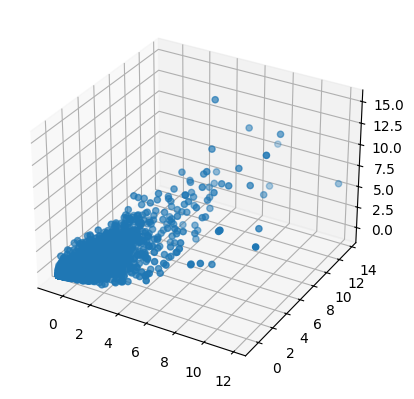

In [46]:
#using 3d scatter plot to check the relationship between the three numeric columns
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['count_session'], df1['count_hit'], df1['num_interactions'])


In [47]:
#concatenating df1 and df2_encoded
dff=pd.concat([df1,df2_encoded],axis=1)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'count_session'),
  Text(1, 0, 'count_hit'),
  Text(2, 0, 'num_interactions'),
  Text(3, 0, 'channelGrouping'),
  Text(4, 0, 'device_browser'),
  Text(5, 0, 'device_operatingSystem'),
  Text(6, 0, 'Products'),
  Text(7, 0, 'region')])

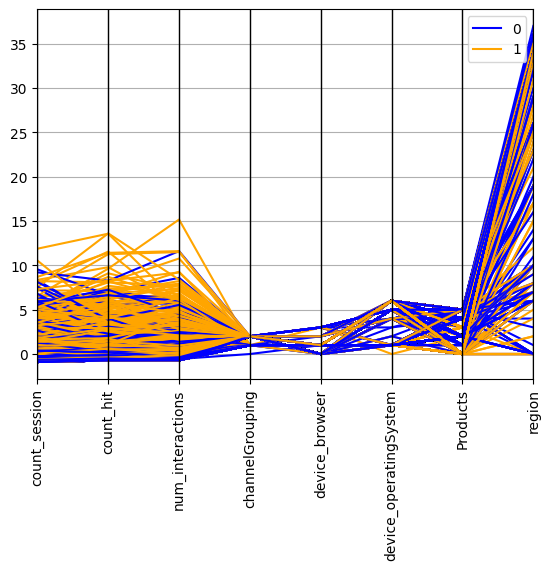

In [48]:
#using pandas parallel coordinates to understand the relationship between the features and the target variable
from pandas.plotting import parallel_coordinates
parallel_coordinates(dff, 'has_converted',color=['blue', 'orange'])
plt.xticks(rotation=90)


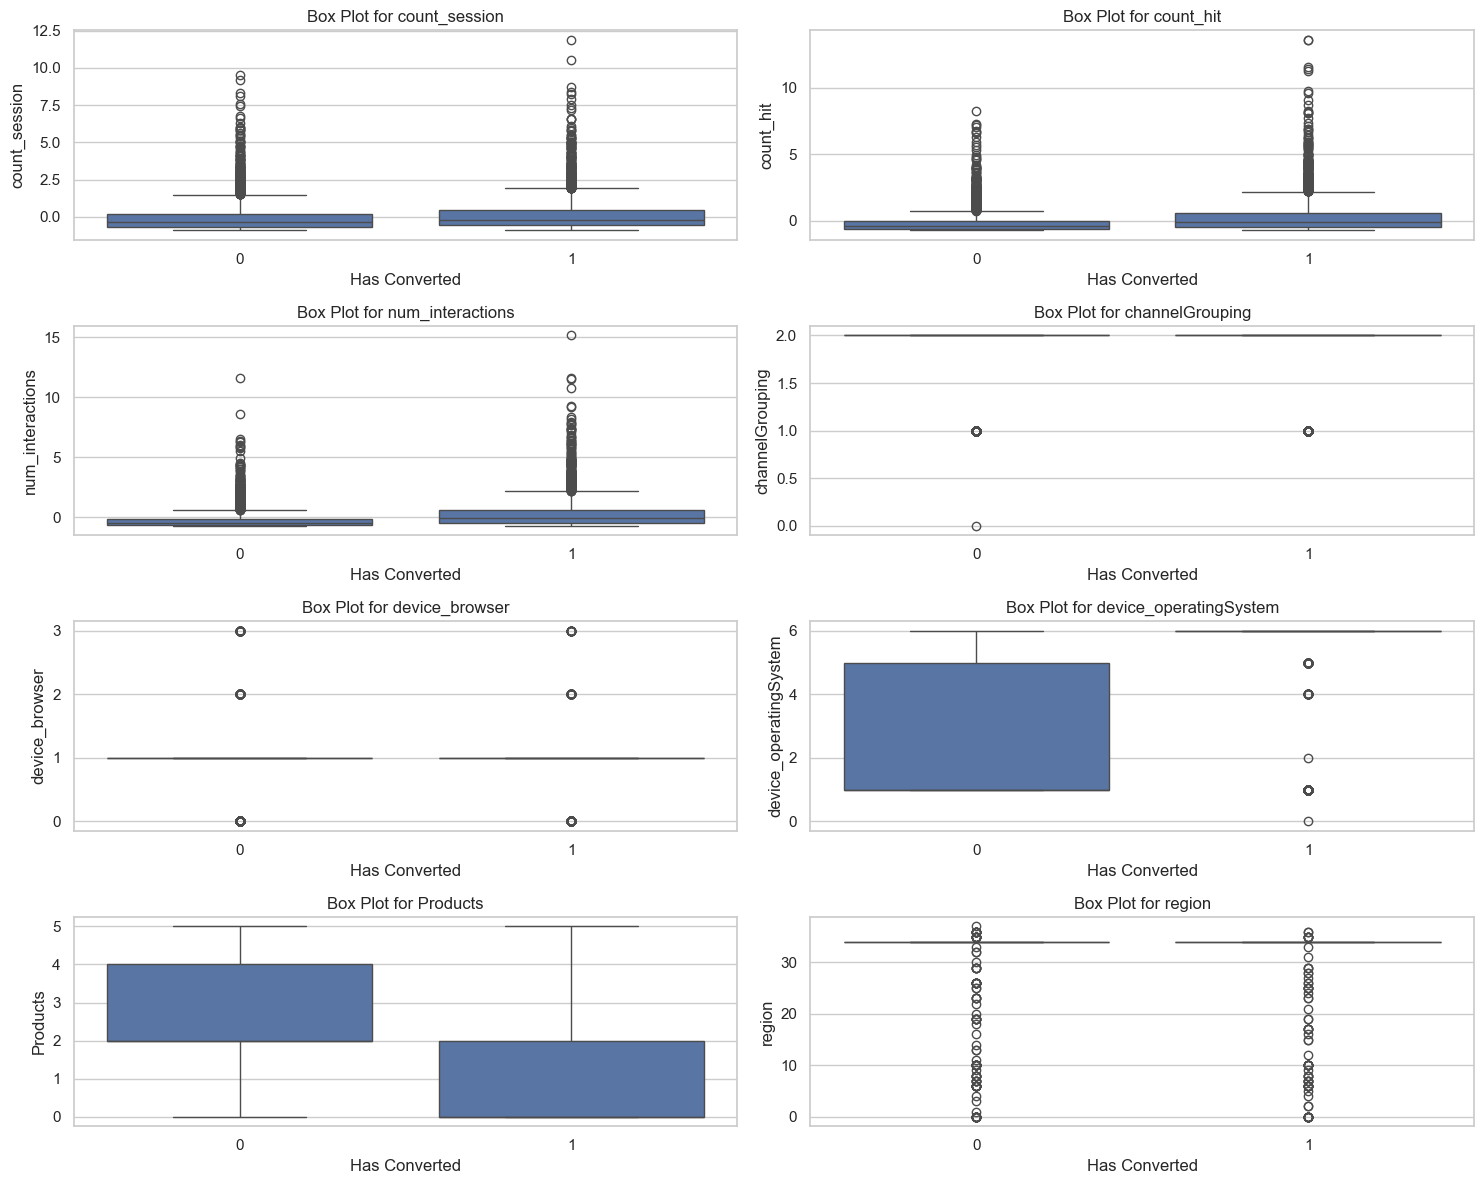

In [49]:
#using boxplot to check for distribution oof variable values
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# List of variables for which you want to create box plots
variables = ['count_session', 'count_hit', 'num_interactions', 'channelGrouping',
             'device_browser', 'device_operatingSystem', 'Products', 'region']

# Create a collage of box plots
for i, variable in enumerate(variables, start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='has_converted', y=variable, data=dff)
    plt.title(f'Box Plot for {variable}')
    plt.xlabel('Has Converted')
    plt.ylabel(variable)

# Adjust layout
plt.tight_layout()
plt.show()


In [50]:
#printing all the unique values in the dataframe
fullunique={col:dff[col].unique() for col in dff.columns}
for col, unique_values in fullunique.items():
    print(f"Unique values in {col}: {unique_values}")

Unique values in count_session: [-5.18001255e-01  3.84274096e-01 -8.50418490e-01 -8.02930313e-01
 -7.07953961e-01  2.71119474e+00  2.89297744e-01 -2.33072197e-01
  2.41809567e-01  3.36785920e-01 -2.80560373e-01 -5.65489431e-01
 -7.55442137e-01 -1.85584020e-01 -1.38095844e-01  1.28654945e+00
 -8.97906666e-01 -4.23024902e-01 -4.70513079e-01  8.11667684e-01
  1.38152580e+00  9.54132213e-01 -9.06076675e-02  1.47650215e+00
  9.93450381e-02 -3.28048550e-01  8.59155860e-01  4.36868528e-03
  1.46833214e-01  6.69203155e-01 -4.31194911e-02  2.23631298e+00
  1.33403762e+00  7.16691331e-01 -6.12977608e-01 -6.60465784e-01
  2.75868292e+00  1.52399033e+00  4.31762273e-01  1.09659674e+00
  1.19157310e+00  1.94321391e-01 -3.75536726e-01  1.00162039e+00
  1.90389574e+00  6.21714978e-01  2.28380115e+00  2.14133662e+00
  5.18568617e-02  5.46550897e+00  8.36228773e+00  5.74226802e-01
  1.04910857e+00  2.80617109e+00  5.26738626e-01  4.04086368e+00
  7.64179508e-01  4.79250449e-01  1.14408492e+00  3.328541

In [51]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   float64
 1   count_hit               9207 non-null   float64
 2   num_interactions        9207 non-null   float64
 3   has_converted           9207 non-null   int64  
 4   channelGrouping         9207 non-null   int32  
 5   device_browser          9207 non-null   int32  
 6   device_operatingSystem  9207 non-null   int32  
 7   Products                9207 non-null   int32  
 8   region                  9207 non-null   int32  
dtypes: float64(3), int32(5), int64(1)
memory usage: 539.5 KB


In [52]:
#creating a correlation matrix 
correlation_matrix = dff.corr()
correlation_matrix_no_nan = correlation_matrix.fillna(0)
correlation_matrix.style.background_gradient(cmap='coolwarm')

,count_session,count_hit,num_interactions,has_converted,channelGrouping,device_browser,device_operatingSystem,Products,region
count_session,1.000000,0.856096,0.760016,0.100391,-0.002417,0.049971,0.045597,-0.035220,0.007262
count_hit,0.856096,1.000000,0.871843,0.228865,0.013933,0.047764,0.234980,-0.095238,0.009041
num_interactions,0.760016,0.871843,1.000000,0.276152,0.025076,0.047733,0.259398,-0.099836,-0.016803
has_converted,0.100391,0.228865,0.276152,1.000000,0.092067,0.056448,0.531552,-0.398129,-0.008719
channelGrouping,-0.002417,0.013933,0.025076,0.092067,1.000000,-0.030852,0.146864,-0.010468,0.025158
device_browser,0.049971,0.047764,0.047733,0.056448,-0.030852,1.000000,-0.028009,-0.035246,-0.013820
device_operatingSystem,0.045597,0.234980,0.259398,0.531552,0.146864,-0.028009,1.000000,-0.176086,-0.028930
Products,-0.035220,-0.095238,-0.099836,-0.398129,-0.010468,-0.035246,-0.176086,1.000000,0.005156
region,0.007262,0.009041,-0.016803,-0.008719,0.025158,-0.013820,-0.028930,0.005156,1.000000


In [53]:
#checking corellation of variables with target variable
dff.corrwith(dff['has_converted'])

count_session             0.100391
count_hit                 0.228865
num_interactions          0.276152
has_converted             1.000000
channelGrouping           0.092067
device_browser            0.056448
device_operatingSystem    0.531552
Products                 -0.398129
region                   -0.008719
dtype: float64

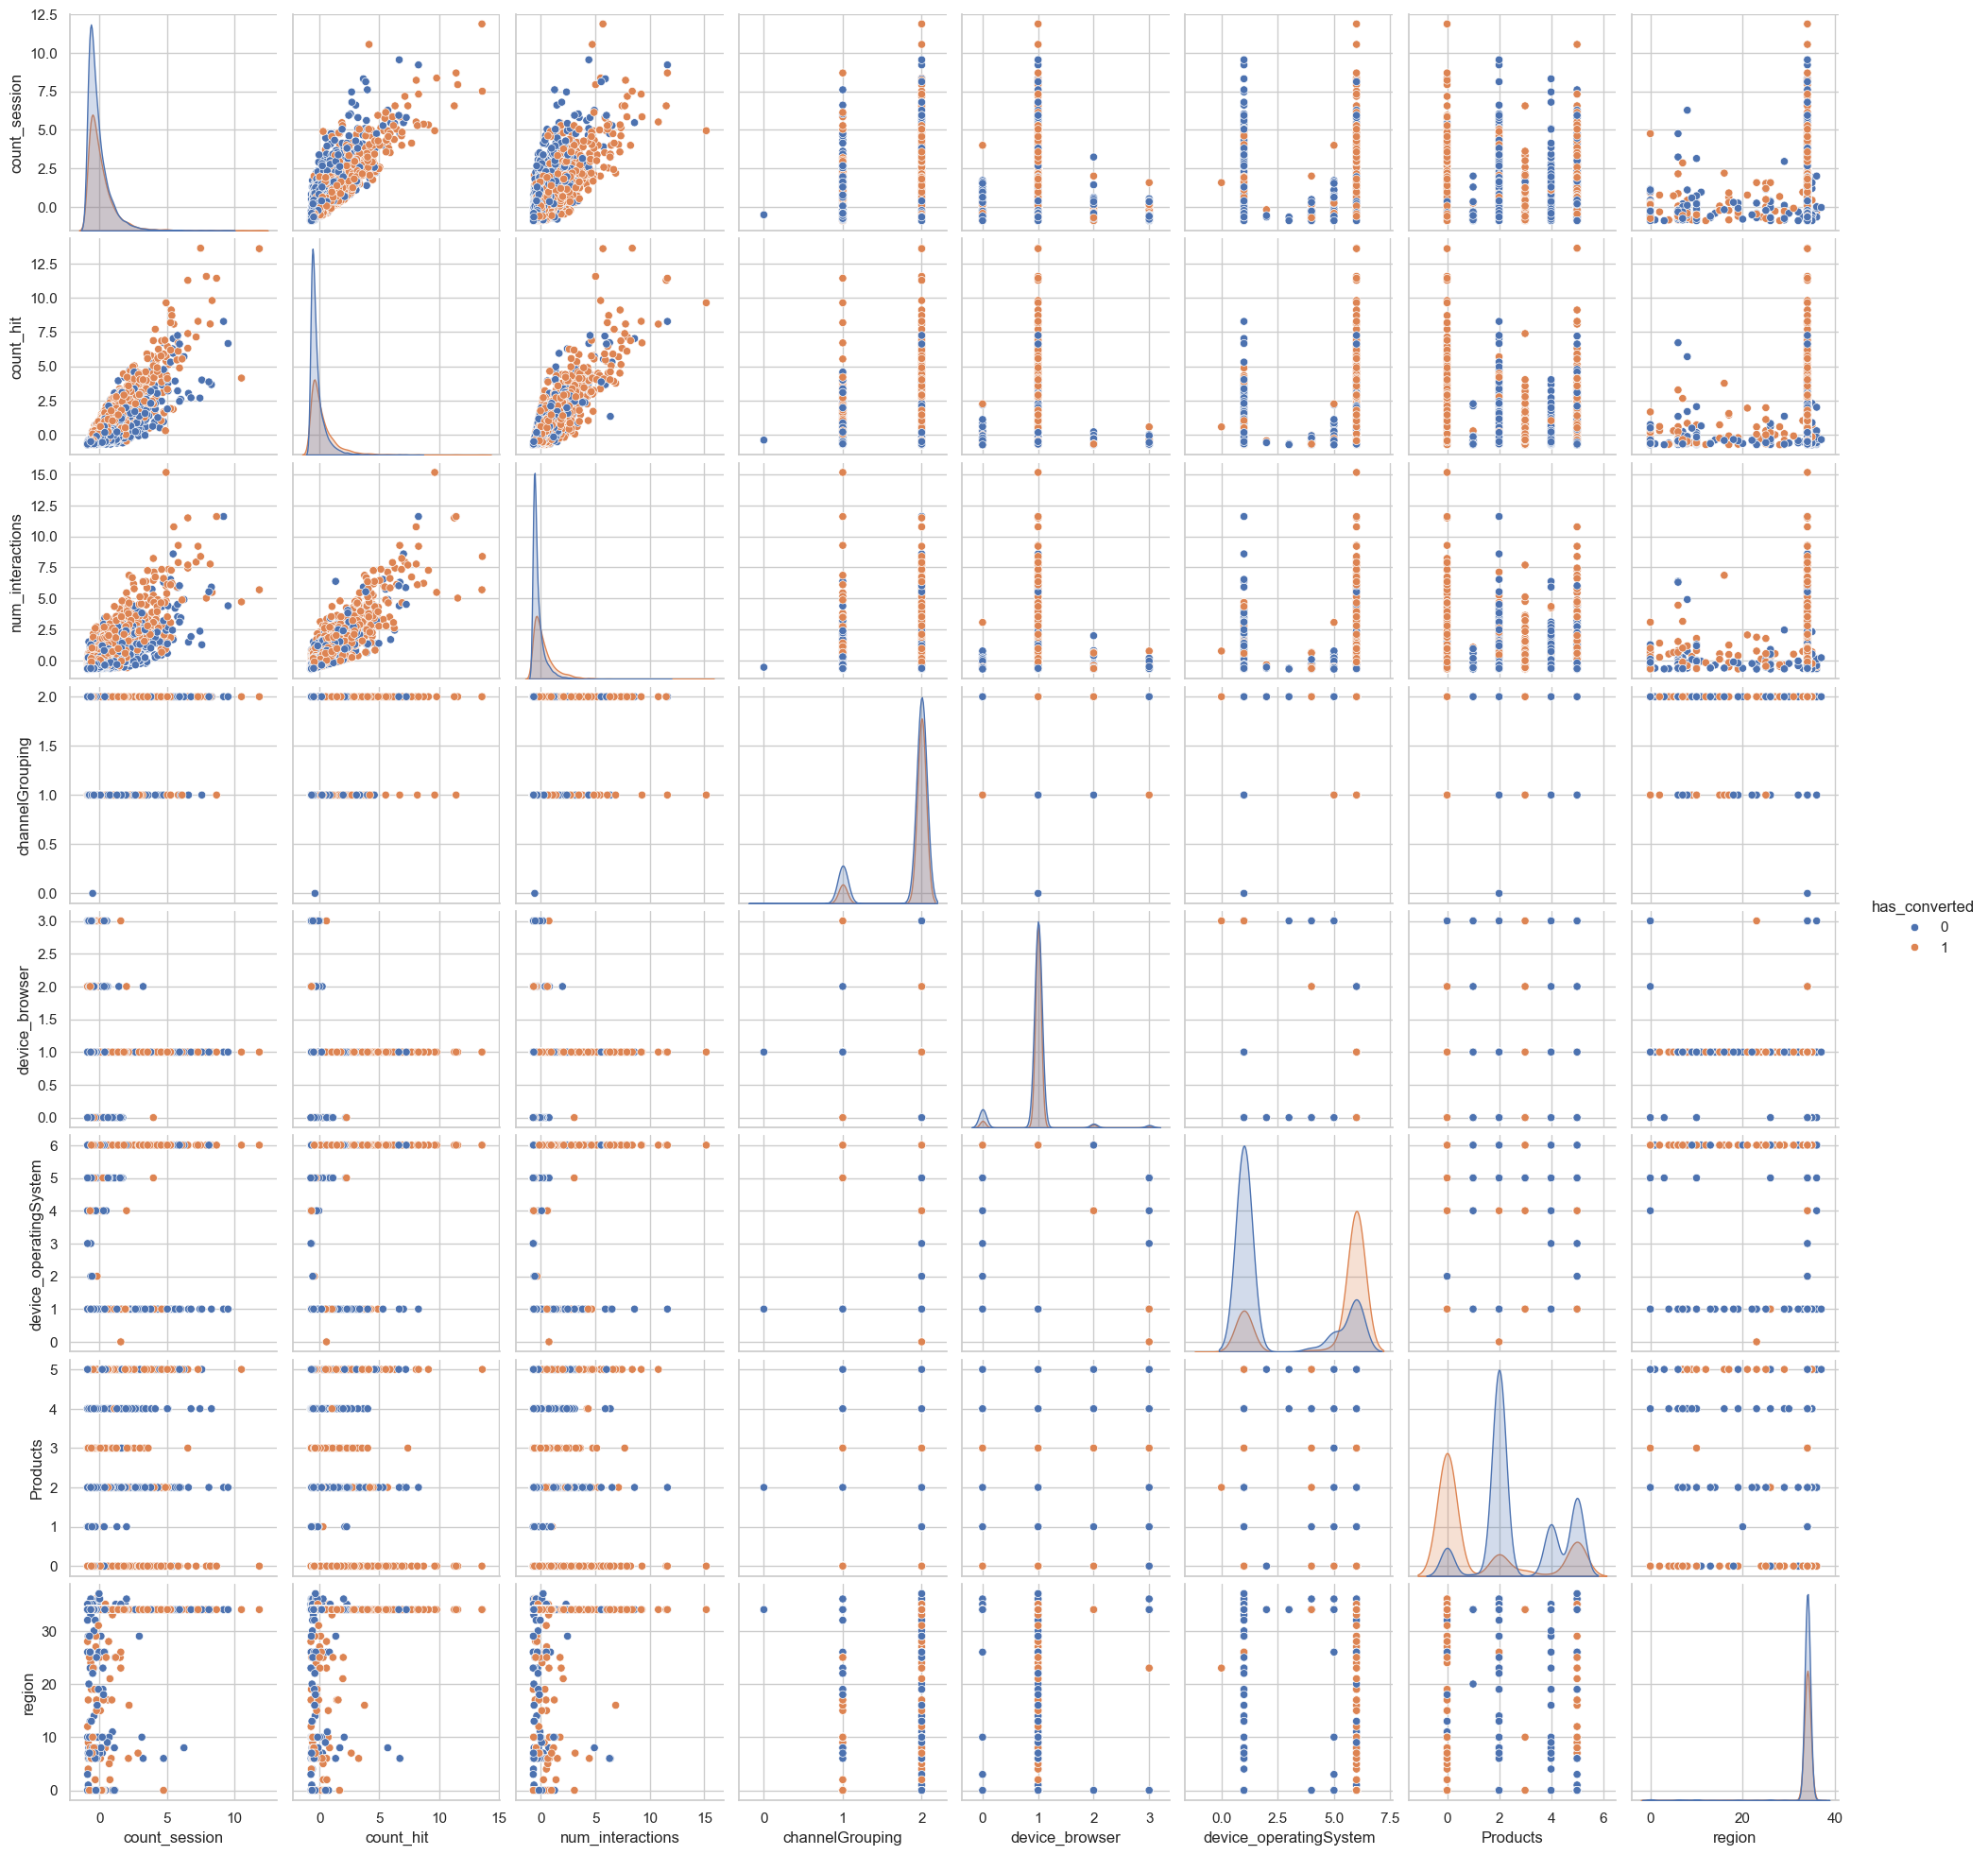

In [54]:
#using pairplot for correlation analysis 
sns.pairplot(dff, hue="has_converted")

In [55]:
#splitting x and y
y=dff['has_converted']
x=dff.drop(['has_converted'],axis=1)

In [56]:
#splitting train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [57]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred1 = random_forest_model.predict(x_test)
f1 = f1_score(y_test, y_pred1, average='weighted')
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')

print('stats for random forest model')
print("f1 score:" ,f1)
print('accuracy:',accuracy)
print("Precision:", precision)
print("Recall:", recall)

stats for random forest model
f1 score: 0.8093506107681324
accuracy: 0.8105320304017373
Precision: 0.8103729886652744
Recall: 0.8105320304017373


In [58]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel for simplicity
svm_model.fit(x_train, y_train)
y_pred2 = svm_model.predict(x_test)
f1 = f1_score(y_test, y_pred2, average='weighted')
# Evaluate the model
f2 = f1_score(y_test, y_pred2, average='weighted')
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')

print('stats for SVM model')
print("f1 score:" ,f2)
print('accuracy:',accuracy)
print("Precision:", precision)
print("Recall:", recall)

stats for SVM model
f1 score: 0.7655473958041359
accuracy: 0.7730727470141151
Precision: 0.7837699729507895
Recall: 0.7730727470141151


In [59]:
#using decission tree classifier 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=10,max_features=None,min_samples_leaf=15)
dtree.fit(x_train,y_train)
y_pred3=dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred3)
f3 = f1_score(y_test, y_pred3, average='weighted')
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')

print('stats for decision tree model')
print("f1 score:" ,f3)
print('accuracy:',accuracy)
print("Precision:", precision)
print("Recall:", recall)

stats for decision tree model
f1 score: 0.8216043095900116
accuracy: 0.8224755700325733
Precision: 0.8222356375478415
Recall: 0.8224755700325733


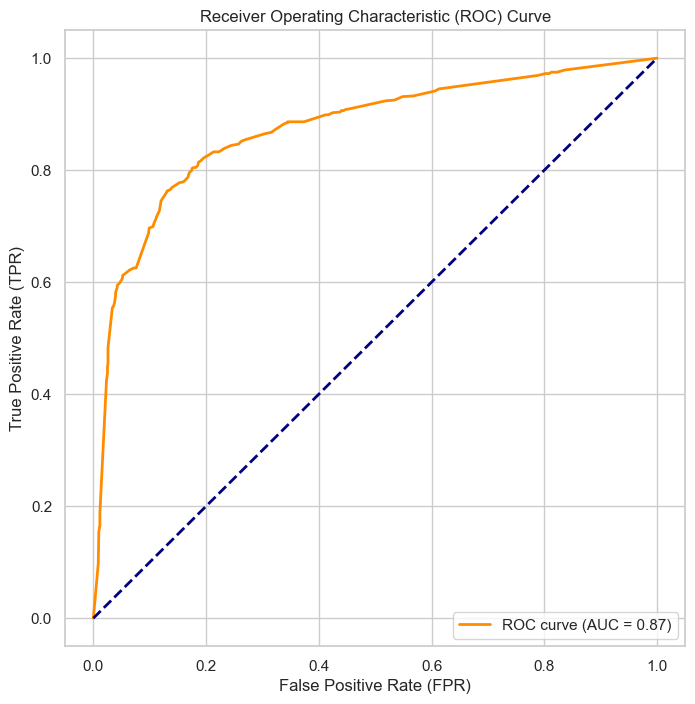

In [60]:
# Calculate the ROC curve and AUC-ROC for dtree classifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_scores = dtree.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\navin\AppData\Local\Temp\ipykernel_16180\713625849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Actual Class', y='Predicted Probabilities', data=df, palette='muted')


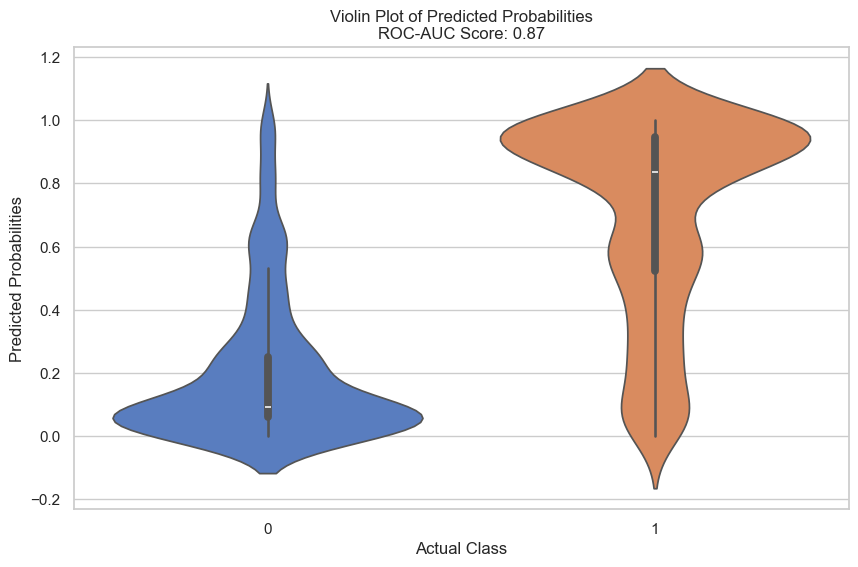

In [61]:
#using violin plot to check distribution of predicted probabilities
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_scores)
df = pd.DataFrame({'Actual Class': y_test, 'Predicted Probabilities': y_scores})
plt.figure(figsize=(10, 6))
sns.violinplot(x='Actual Class', y='Predicted Probabilities', data=df, palette='muted')
plt.title(f'Violin Plot of Predicted Probabilities\nROC-AUC Score: {roc_auc:.2f}')
plt.show()

In [62]:
#using pickle to save the model
import pickle 
import joblib


with open('dtree.pkl', 'wb') as file:
    pickle.dump(dtree, file)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
#exporting standard scaler 
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [63]:
#checking the model with demo data
new_data = pd.DataFrame({ 'count_session': [36], 'count_hit': [29], 'num_interactions': [5], 'channelGrouping': [5], 'device_browser': [3], 'device_operatingSystem': [3], 'Products': [4], 'region': [18] })
predictions = random_forest_model.predict(new_data)
predictions

array([0], dtype=int64)

In [64]:
#mapping the label encoded values to list to export it to new environment
mapping_dict1 = dict(zip(df2['channelGrouping'], df2_encoded['channelGrouping']))
mapping_dict2 = dict(zip(df2['device_browser'], df2_encoded['device_browser']))
mapping_dict3 = dict(zip(df2['device_operatingSystem'], df2_encoded['device_operatingSystem']))
mapping_dict4 = dict(zip(df2['Products'], df2_encoded['Products']))
mapping_dict5 = dict(zip(df2['region'], df2_encoded['region']))


#exporting the mapped dictionary
with open('mapping_dict1.pkl', 'wb') as file:
    pickle.dump(mapping_dict1, file)

with open('mapping_dict2.pkl', 'wb') as file:
    pickle.dump(mapping_dict2, file)

with open('mapping_dict3.pkl', 'wb') as file:
    pickle.dump(mapping_dict3, file)

with open('mapping_dict4.pkl', 'wb') as file:
    pickle.dump(mapping_dict4, file)

with open('mapping_dict5.pkl', 'wb') as file:
    pickle.dump(mapping_dict5, file)

In [65]:
dff.to_csv('dff.csv')
df2.to_csv('df2.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')